In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [3]:
# ---------------------------
# 1. Generate synthetic data
# ---------------------------
n = 10  # Number of data points
x, y = make_regression(n_samples=n, n_features=1, n_informative=1, noise=10, random_state=10)

# Define two sample points for prediction
x_sample = np.array([[-2], [2]])

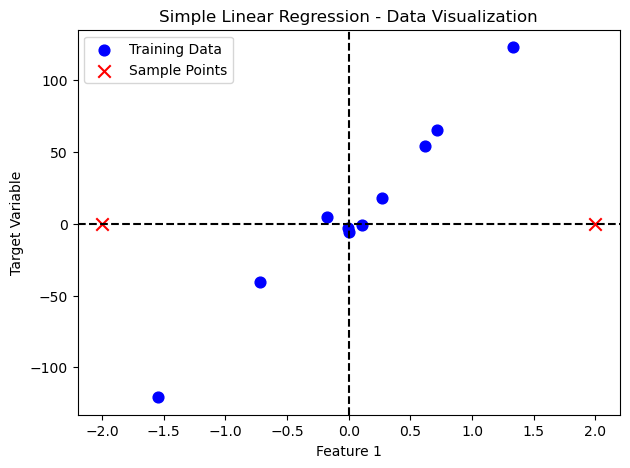

In [5]:
# ---------------------------
# 2. Visualize the data
# ---------------------------
plt.figure(figsize=(7, 5))
plt.scatter(x, y, s=60, marker='o', label='Training Data', color='blue')  # Training points
plt.scatter(x_sample, [0, 0], s=80, marker='x', color='red', label='Sample Points')  # Sample points
plt.axhline(y=0, color='k', linestyle='--')  # Horizontal axis
plt.axvline(x=0, color='k', linestyle='--')  # Vertical axis
plt.xlabel("Feature 1")
plt.ylabel("Target Variable")
plt.title('Simple Linear Regression - Data Visualization')
plt.legend()
plt.show()

In [7]:
# ------------------------------------------
# 3. Prepare Data for Regression Model
# ------------------------------------------
y = y.reshape(n, 1)  # Convert target variable to 2D array

# Add bias term (x0 = 1) to each instance
x_new = np.c_[np.ones(len(x)), x.flatten()]  # Shape: (n, 2)
x_new_sample = np.c_[np.ones(len(x_sample)), x_sample.flatten()]  # Add bias to sample points

In [9]:
# ------------------------------------------
# 4. Define Functions for Regression
# ------------------------------------------
def predict_regression(inputs, weights):
    """
    Compute the prediction for a given input using linear regression.
    """
    return np.dot(inputs, weights)

def compute_mse(matrix, weights, y):
    """
    Compute the Mean Squared Error (MSE) for the given dataset.
    """
    errors = predict_regression(matrix, weights) - y.flatten()
    mse = np.mean(errors ** 2)
    return mse

In [11]:
# ------------------------------------------
# 5. Training the Model Using Gradient Descent
# ------------------------------------------
nb_epoch = 100  # Number of training iterations
learning_rate = 0.1  # Learning rate
weights = np.array([0.20, 1.00])  # Initial weights

# Training loop
for epoch in range(nb_epoch):
    mse = compute_mse(x_new, weights, y)
    
    # Print progress every 10 epochs
    if epoch % 10 == 0:
        print(f"\nEpoch {epoch}")
        print(f"Current Weights: {weights}")
        print(f"Mean Squared Error: {mse:.4f}")
        print(f"Prediction for x = {x_sample[0][0]}: {predict_regression(x_new_sample[0], weights):.4f}")
        print(f"Prediction for x = {x_sample[1][0]}: {predict_regression(x_new_sample[1], weights):.4f}")
    
    # Gradient Descent update
    for i in range(len(x_new)):
        prediction = predict_regression(x_new[i], weights)
        error = prediction - y[i]  # Compute the error
        weights -= learning_rate * error * x_new[i]  # Update weights


Epoch 0
Current Weights: [0.2 1. ]
Mean Squared Error: 3809.4758
Prediction for x = -2: -1.8000
Prediction for x = 2: 2.2000

Epoch 10
Current Weights: [ 4.79836452 81.75156069]
Mean Squared Error: 94.4861
Prediction for x = -2: -158.7048
Prediction for x = 2: 168.3015

Epoch 20
Current Weights: [ 4.77792208 81.86266566]
Mean Squared Error: 94.5623
Prediction for x = -2: -158.9474
Prediction for x = 2: 168.5033

Epoch 30
Current Weights: [ 4.77789302 81.8628211 ]
Mean Squared Error: 94.5624
Prediction for x = -2: -158.9477
Prediction for x = 2: 168.5035

Epoch 40
Current Weights: [ 4.77789297 81.86282132]
Mean Squared Error: 94.5624
Prediction for x = -2: -158.9477
Prediction for x = 2: 168.5035

Epoch 50
Current Weights: [ 4.77789297 81.86282132]
Mean Squared Error: 94.5624
Prediction for x = -2: -158.9477
Prediction for x = 2: 168.5035

Epoch 60
Current Weights: [ 4.77789297 81.86282132]
Mean Squared Error: 94.5624
Prediction for x = -2: -158.9477
Prediction for x = 2: 168.5035

Epo

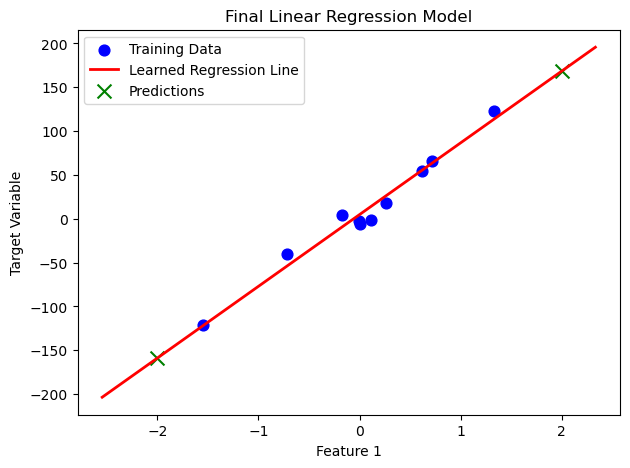

In [13]:
# ------------------------------------------
# 6. Visualizing the Final Regression Line
# ------------------------------------------
x_line = np.linspace(x.min() - 1, x.max() + 1, 100)  # Create a range of x values for plotting
y_line = predict_regression(np.c_[np.ones(len(x_line)), x_line], weights)  # Compute corresponding y values

plt.figure(figsize=(7, 5))
plt.scatter(x, y, s=60, marker='o', label='Training Data', color='blue')
plt.plot(x_line, y_line, color='red', linewidth=2, label='Learned Regression Line')
plt.scatter(x_sample, predict_regression(x_new_sample, weights), s=100, marker='x', color='green', label='Predictions')
plt.xlabel("Feature 1")
plt.ylabel("Target Variable")
plt.title('Final Linear Regression Model')
plt.legend()
plt.show()

In [15]:
# ------------------------------------------
# 7. Display Final Weights and Predictions
# ------------------------------------------
print("\nFinal Weights:")
print(f"w_0 (Bias): {weights[0]:.4f}")
print(f"w_1 (Slope): {weights[1]:.4f}")
print("\nFinal Predictions:")
print(f"Prediction for x = {x_sample[0][0]}: {predict_regression(x_new_sample[0], weights):.4f}")
print(f"Prediction for x = {x_sample[1][0]}: {predict_regression(x_new_sample[1], weights):.4f}")


Final Weights:
w_0 (Bias): 4.7779
w_1 (Slope): 81.8628

Final Predictions:
Prediction for x = -2: -158.9477
Prediction for x = 2: 168.5035
